# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [1]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [32]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

<b>Номер 1.1</b>

Создайте нулевую матрицу Z размера  3×4

In [33]:
Z = np.zeros((3,4), dtype=np.int)
Z

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

<b>Номер 1.2</b> 

Создайте диагональную матрицу  5×5  с диагональными элементами 1, 2, 3, 4 и 5

In [34]:
Z = np.diagflat([1, 2, 3, 4, 5])
Z

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

<b>Номер 1.3</b>

найдите её след (не силою мысли, а с помощью библиотечных функций, конечно)

In [35]:
np.trace(Z)


15

<b>Номер 1.4</b>

найдите обратную к ней матрицу

In [36]:
sla.inv(Z)

array([[ 1.        ,  0.        , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        ,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333,  0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

<b>Номер 1.5</b>

сгенерируйте случайную матрицу  X  размера  4×5

In [37]:
X = np.random.rand(4, 5)
X

array([[0.74560582, 0.12593585, 0.30641137, 0.07874017, 0.63230445],
       [0.63224936, 0.26704304, 0.44151579, 0.64839517, 0.80212277],
       [0.39577294, 0.70324896, 0.76146474, 0.99070374, 0.06237304],
       [0.74862315, 0.79532551, 0.98630913, 0.78056746, 0.16743294]])

<b>Номер 1.6</b>

найдите определитель подматрицы матрицы  X , расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется минором матрицы  X


In [38]:
sla.det(X[1:3, :2])


0.3389402923804058

<b>Номер 1.7</b>

найдите произведение  XT*X .


In [39]:
X.T @ X

array([[1.67274013, 1.13646229, 1.54735116, 1.44510117, 1.12862122],
       [1.13646229, 1.21427358, 1.47642799, 1.50058222, 0.47085857],
       [1.54735116, 1.47642799, 1.84145836, 1.83467037, 0.76053064],
       [1.44510117, 1.50058222, 1.83467037, 2.01739579, 0.7623662 ],
       [1.12862122, 0.47085857, 0.76053064, 0.7623662 , 1.07513404]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [44]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    if len(X) != len(X[0]):
      raise ValueError
    n = len(X)
    i = 0
    nakop = 1
    while i < n:
      tmp = 0
      if X[i][i] == 0:
        tmp = 1
        for j in range(i + 1,n):
          if X[j][i] != 0:
            tmp = 0
            X[i], X[j] = X[j].copy(), X[i].copy()
            nakop *= -1
            break
      if tmp == 0:
        for j in range(i + 1, n):
          mnozh = X[j][i] / X[i][i]
          for t in range(n):
            X[j][t] -= mnozh * X[i][t]
      i += 1
    det = 1
    for i in range(n):
      det *= X[i][i]
    return det

Простая проверка:

In [45]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(np.linalg.det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [46]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

The slowest run took 13.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 12.7 µs per loop
1000 loops, best of 5: 511 µs per loop
The slowest run took 5.24 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 142 µs per loop
1 loop, best of 5: 502 ms per loop
10 loops, best of 5: 26.4 ms per loop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars


1 loop, best of 5: 8min 29s per loop


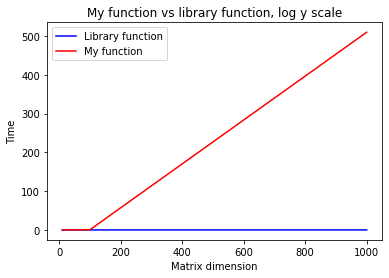

In [50]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)
    
plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

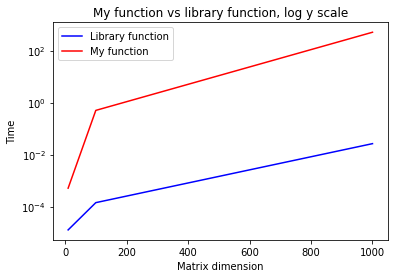

In [51]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

<b>1 вариант</b>

In [52]:
np.array([[1, 0], [10**20, 1]]) @ np.array([[10**-20, 1], [0, 1-10**20]])

array([[1e-20, 1],
       [1.0, 1]], dtype=object)

<b>2 вариант</b>


In [53]:
np.array([[1., 0.], [10.**20, 1.]]) @ np.array([[10.**-20, 1.], [0., 1.-10.**20]])

array([[1.e-20, 1.e+00],
       [1.e+00, 0.e+00]])

И какой из них правильный?

---
**Правильным оказался 1 вариант**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [54]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    
    for i in range(len(P)):
      for j in range(len(P)):
        if i == 0 or j == 0:
          P[i][j] = 1
        else:
          P[i][j] = P[i-1][j] + P[i][j-1]
    return P
my_pascal(4)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  4.],
       [ 1.,  3.,  6., 10.],
       [ 1.,  4., 10., 20.]])

Чему равен её определитель? Строго поясните свой ответ.

----
**Определитель либой матрицы Паскаля будет равен 1, т.к. после приведения любой матрицы такого вида к верхнетреугольному виду мы получим только единицы на главной диагонали.**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [55]:
sla.det(my_pascal(30))

4.6365440194083456e+47

Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

<b>1 шаг</b>

Нашел решение системы

In [56]:
sla.solve(np.array([[1, 1000], [100, 100001]]), np.array([[2004], [200402]]))

array([[4.],
       [2.]])

**2 шаг**

Нашел определитель матрицы коэффициентов

In [57]:
sla.det(np.array([[1, 1000], [100, 100001]]))

1.0000000000047748

Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [58]:
sla.solve(np.array([[1, 1000], [100, 100001]]), np.array([[2004.01], [200402]]))

array([[1.00401e+03],
       [1.00000e+00]])

Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [59]:
def my_cond(A):
    '''
    Parameters
    ----------
    A : array_like
    
    Returns
    -------
    cond : float
          Condition number of A.
    '''
    if len(A) != len(A[0]):
      raise ValueError
    if sla.det(A) == 0:
      cond = float('Inf')
    else:
      cond = (np.trace(A.T @ A) * np.trace(sla.inv(A).T @ sla.inv(A))) ** 0.5
    return cond
my_cond(my_pascal(5))

8549.0

Посчитайте число обусловленности матрицы из задания 3.3.

In [60]:
my_cond(np.array([[1, 1000], [100, 100001]]))

10001210002.009096

Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

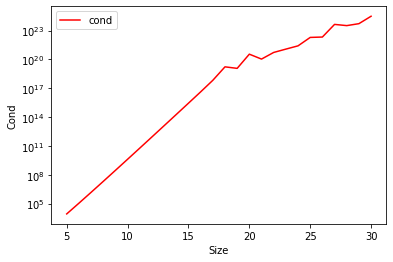

In [61]:
fig, ax = plt.subplots()
k = [i for i in range(5, 31)]
t = []
for i in range(5, 31):
  t.append(my_cond(my_pascal(i)))
ax.semilogy(k, t, color='red', label='cond')
plt.ylabel('Cond')
plt.xlabel('Size')
plt.legend()

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [62]:
def prod_and_sq_sum(A):
  k = np.diag(A)
  ans1 = np.prod(k)
  ans2 = (k * k.reshape(1, len(k))).sum()
  return ans1, ans2
prod_and_sq_sum(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))

(45, 107)

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [63]:
def f(A, B, lmbd, k):
  tmp = min(len(A), k)
  A = A[:, :tmp]
  B = B[:, :tmp]
  lmbd = lmbd[:tmp]
  A = A * lmbd.reshape(1,len(lmbd))
  ans = A @ B.T
  return ans
f(np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]), np.array([2, 2]), 6)

array([[ 34,  46],
       [ 78, 106]])

**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [64]:
def get_diag(A,B):
  return np.sum(A * B.T, axis=1)
get_diag(np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]]))

array([19, 50])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [3]:
def shrink_rotate(x, a, coef=1., angle=0.):
    x = (x - a) * coef
    re = (x + np.conj(x)) / 2
    im = (x - np.conj(x)) / 2
    x = re * (np.cos(angle) - np.sin(angle)) +\
     im * (np.sin(angle) + np.cos(angle))
    x = x + a
    return x
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    x = (x - a) * coef
    re = (x + np.conj(x)) / 2
    im = (x - np.conj(x)) / 2
    x = re * (np.cos(angle) - np.sin(angle)) -\
     im * (np.sin(angle) + np.cos(angle))
    x = x + a
    return x
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    x = a + r**2 / (np.conj(x) - np.conj(a))
    return x
    raise NotImplementedError()

print(geometric_inverse(6 + 1j, 4 + 2j, 5.))

(14-3j)


**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

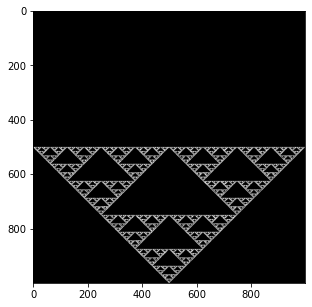

In [10]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
graph = [[0]*1000 for i in range(1000)]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = (funcs[n_func](z))
    if n_iter >= 10:
      graph[int(z.imag * 1000)//2 + 500][int(z.real * 1000)//2 + 500] = 1
plt.figure(figsize=(5, 5))
plt.imshow(graph, cmap='gray')

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Каждый раз происходит деление пополам, поэтому треугольники становятся меньше в 2 раза. Верхняя половина плоскости не заполнена, потому что мы не вычитаем из z мнимую часть, а только прибавляем

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

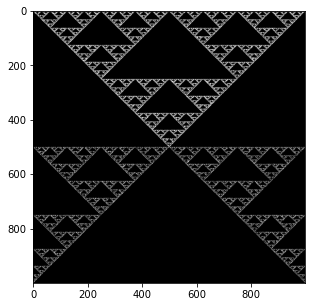

In [8]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
graph = [[0]*1000 for i in range(1000)]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = (funcs[n_func](z))
    if n_iter >= 10:
      graph[int(z.imag * 1000)][int(z.real * 1000)] = 1
plt.figure(figsize=(5, 5))
plt.imshow(graph, cmap='gray')

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [73]:
def gauss(A, B):
  X = sla.solve(A, B)
  return X

def inv(A, B):
  X = sla.inv(A) @ B
  return X
inv(np.array([[1, 2], [1, -1]]), np.array([[1, 1], [0, -1]]))

array([[ 0.33333333, -0.33333333],
       [ 0.33333333,  0.66666667]])

### **1 Пункт**

Сравнение скорости решения системы при фиксированном `m = 10` и для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей)

The slowest run took 152.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 51.5 µs per loop
The slowest run took 6.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 18.6 µs per loop
10000 loops, best of 5: 122 µs per loop
The slowest run took 7.84 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 110 µs per loop
1000 loops, best of 5: 277 µs per loop
1000 loops, best of 5: 333 µs per loop
1000 loops, best of 5: 997 µs per loop
1000 loops, best of 5: 2.31 ms per loop
100 loops, best of 5: 8.11 ms per loop
100 loops, best of 5: 22.3 ms per loop
10 loops, best of 5: 36.9 ms per loop
10 loops, best of 5: 130 ms per loop


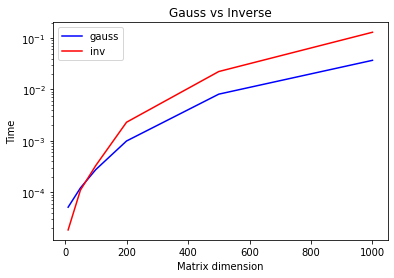

In [74]:
gauss_times = []
inv_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
m = 10
for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, m)
    res_lib = %timeit -o gauss(A,B)
    gauss_times.append(res_lib.best)
    res_my = %timeit -o inv(A, B)
    inv_times.append(res_my.best)

plt.semilogy(dimensions, gauss_times, color='blue', label='gauss')
plt.semilogy(dimensions, inv_times, color='red', label='inv')
plt.title('Gauss vs Inverse')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

### **Вывод из первого пункта**

Из графика видно, что функция, отображающая время решения уравнения методом Гаусса, растет медленнее, чем функция, отображающия время решения уравнения методом умнажения на обратную матрицу. При этом вначале видно, что метод Гаусса работал медленнее.

Это означает, что при решении уравнений с небольшим количеством неизвестных резонно использовать метод умножения на обратную матрицу, а при решении уравнений с большим количеством неизвестных - метод Гаусса.

### **2 Пункт**

Сравнение скорости решения системы при фиксированном `n = 100` и для `m=10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

1000 loops, best of 5: 264 µs per loop
1000 loops, best of 5: 339 µs per loop
1000 loops, best of 5: 385 µs per loop
The slowest run took 10.20 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 599 µs per loop
1000 loops, best of 5: 910 µs per loop
1000 loops, best of 5: 921 µs per loop
100 loops, best of 5: 1.53 ms per loop
The slowest run took 4.56 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 1.46 ms per loop
100 loops, best of 5: 2.88 ms per loop
100 loops, best of 5: 2.66 ms per loop
100 loops, best of 5: 7.13 ms per loop
100 loops, best of 5: 6.25 ms per loop
100 loops, best of 5: 15.3 ms per loop
100 loops, best of 5: 11.3 ms per loop


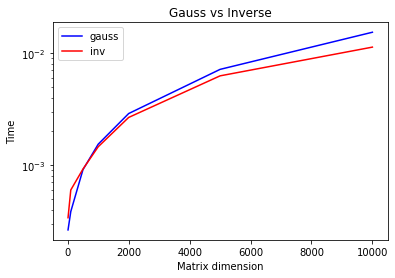

In [75]:
gauss_times = []
inv_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100
for dim in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, dim)
    res_lib = %timeit -o gauss(A,B)
    gauss_times.append(res_lib.best)
    res_my = %timeit -o inv(A, B)
    inv_times.append(res_my.best)

plt.semilogy(dimensions, gauss_times, color='blue', label='gauss')
plt.semilogy(dimensions, inv_times, color='red', label='inv')
plt.title('Gauss vs Inverse')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

### **Вывод из второго пункта**

Из графика видно, что функция, отображающая время решения уравнения методом Гаусса, растет быстрее, чем функция, отображающия время решения уравнения методом умножения на обратную матрицу. При этом вначале видно, что метод Гаусса работал быстрее.

Это означает, что при решении уравнений `AX = B`, где `B` - относительно небольшая матрица логичнее пользоваться методом Гаусса, а при больших размерах `B`  следует использовать метод умножения на обратую матрицу

### **Общий вывод с асимптотиками**

Логичнее использовать метод Гаусса при решении уравнений, где `m` сильно больше `n`, а метод умножения на обратную соответсвенно в противоположном случае.

При использовании метода Гаусса асимптотика будет O(min(n, m)*nm)

А при домножении на обратную - O($n^3$)

Это объясняет, почему в первом случае метод Гаусса работает быстрее, а во втором - метод умножения на обратную матрицу. Действительно, когда мы увеличиваем `n` быстрее растет время решения методом домножения на обратную(ведь там $n^3$, а в методе гаусса максимум $n^2$). Во втором случае по аналогичным причинам бытрее растет время решения методом Гаусса.

